## Perform Exploratory Data Analysis - Univariate
- Examine each feature individually to determine their distribution
- Form initial hypotheses regarding their level of influence

In [31]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Read the cleaned source file into a DataFrame.
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'WA-Telco-Customer-Churn-EDA.csv')
df = pd.read_csv(source_file, header=0, index_col=0)

In [33]:
# Inspect the dataframe to determine the datatype of each feature.
df.dtypes

Customerid           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [34]:
def set_datatypes(dframe):
    for col in dframe.columns:
        if dframe[col].dtypes.str.startswith('int'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='integer',
                                        errors='coerce')
            
        elif dframe[col].dtypes.str.startswith('float'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='float',
                                        errors='coerce')
            
        elif dframe[col].dtypes == 'object':
            dframe[col] = dframe[col].astype('category')
        
    return dframe

df = set_datatypes(df)

# Validate new data type assignments.
df.dtypes

Customerid          category
Gender              category
SeniorCitizen       category
Partner             category
Dependents          category
Tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [35]:
# Get Descriptive statistics regarding all numeric features.
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [36]:
# Inspect the first 5 observations.
df.head()

,Customerid,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Univariate Analysis of Categorical Variables

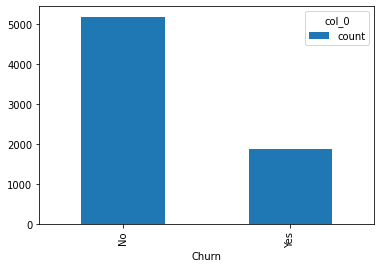

In [37]:
churn_df = pd.crosstab(index = df.Churn, columns="count")
churn_df.plot.bar()

In [38]:
churn_df/churn_df.sum()

col_0,count
Churn,
No,0.73463
Yes,0.26537


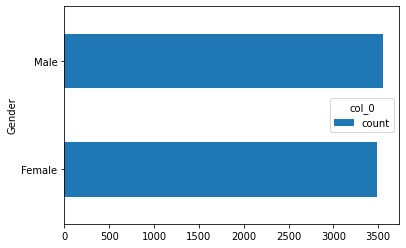

In [39]:
gender_df = pd.crosstab(index = df.Gender, columns="count")
gender_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [40]:
gender_df/gender_df.sum()

col_0,count
Gender,
Female,0.495244
Male,0.504756


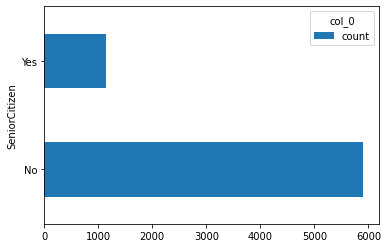

In [41]:
senior_df = pd.crosstab(index = df.SeniorCitizen, columns="count")
senior_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [42]:
senior_df/senior_df.sum()

col_0,count
SeniorCitizen,
No,0.837853
Yes,0.162147


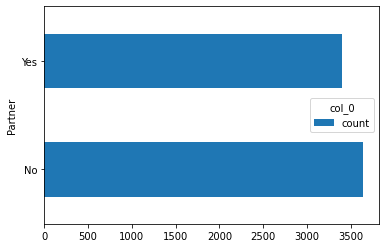

In [43]:
partner_df = pd.crosstab(index = df.Partner, columns="count")
partner_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [44]:
partner_df/partner_df.sum()

col_0,count
Partner,
No,0.516967
Yes,0.483033


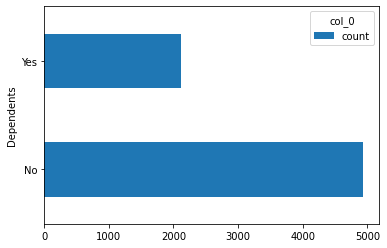

In [45]:
dependents_df = pd.crosstab(index = df.Dependents, columns="count")
dependents_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [46]:
dependents_df/dependents_df.sum()

col_0,count
Dependents,
No,0.700412
Yes,0.299588


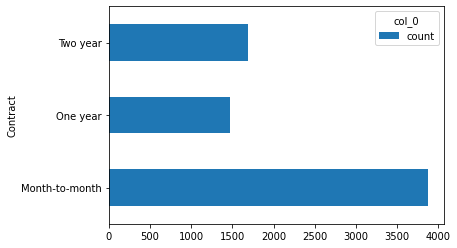

In [47]:
contract_df = pd.crosstab(index = df.Contract, columns="count")
contract_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [48]:
contract_df/contract_df.sum()

col_0,count
Contract,
Month-to-month,0.550192
One year,0.209144
Two year,0.240664


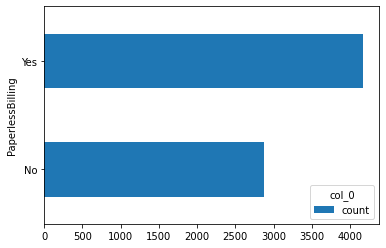

In [49]:
billing_df = pd.crosstab(index = df.PaperlessBilling, columns="count")
billing_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [50]:
billing_df/billing_df.sum()

col_0,count
PaperlessBilling,
No,0.407781
Yes,0.592219


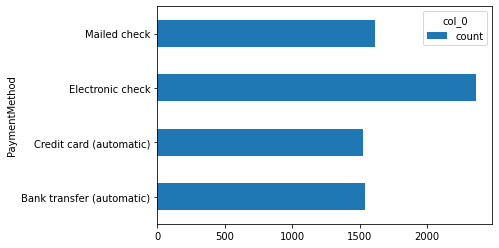

In [51]:
paymethod_df = pd.crosstab(index = df.PaymentMethod, columns="count")
paymethod_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [52]:
paymethod_df/paymethod_df.sum()

col_0,count
PaymentMethod,
Bank transfer (automatic),0.219225
Credit card (automatic),0.216101
Electronic check,0.335794
Mailed check,0.228880


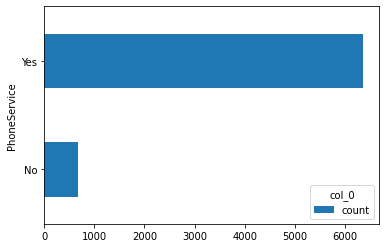

In [53]:
phone_df = pd.crosstab(index = df.PhoneService, columns="count")
phone_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [54]:
phone_df/phone_df.sum()

col_0,count
PhoneService,
No,0.096834
Yes,0.903166


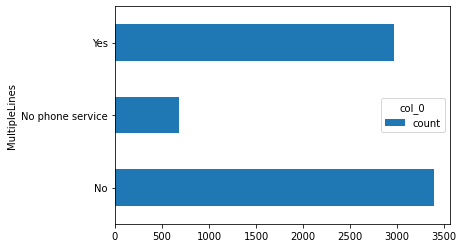

In [55]:
multiplelines_df = pd.crosstab(index = df.MultipleLines, columns="count")
multiplelines_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [56]:
multiplelines_df/multiplelines_df.sum()

col_0,count
MultipleLines,
No,0.481329
No phone service,0.096834
Yes,0.421837


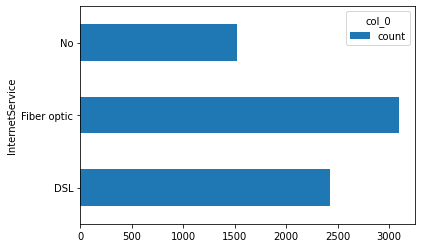

In [57]:
internet_df = pd.crosstab(index = df.InternetService, columns="count")
internet_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [58]:
internet_df/internet_df.sum()

col_0,count
InternetService,
DSL,0.343746
Fiber optic,0.439585
No,0.216669


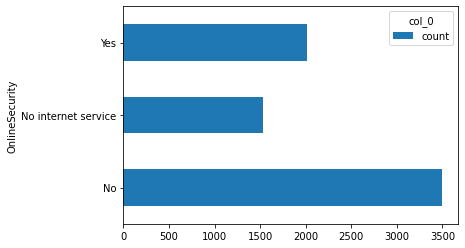

In [59]:
olsecurity_df = pd.crosstab(index = df.OnlineSecurity, columns="count")
olsecurity_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [60]:
olsecurity_df/olsecurity_df.sum()

col_0,count
OnlineSecurity,
No,0.496663
No internet service,0.216669
Yes,0.286668


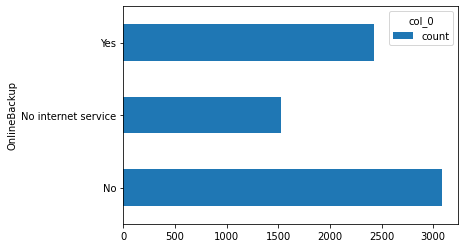

In [61]:
olbackup_df = pd.crosstab(index = df.OnlineBackup, columns="count")
olbackup_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [62]:
olbackup_df/olbackup_df.sum()

col_0,count
OnlineBackup,
No,0.438450
No internet service,0.216669
Yes,0.344881


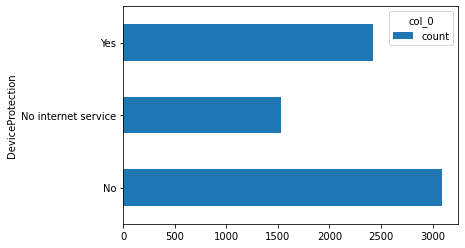

In [63]:
devprotect_df = pd.crosstab(index = df.DeviceProtection, columns="count")
devprotect_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [64]:
devprotect_df/devprotect_df.sum()

col_0,count
DeviceProtection,
No,0.439443
No internet service,0.216669
Yes,0.343888


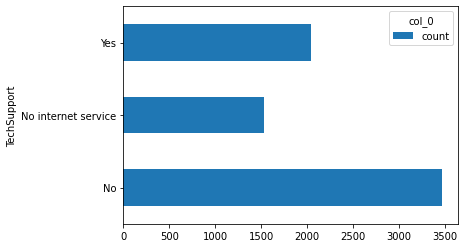

In [65]:
techsupport_df = pd.crosstab(index = df.TechSupport, columns="count")
techsupport_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [66]:
techsupport_df/techsupport_df.sum()

col_0,count
TechSupport,
No,0.493114
No internet service,0.216669
Yes,0.290217


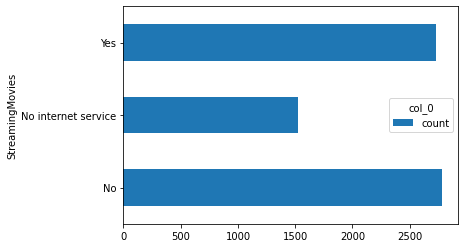

In [67]:
strmovies_df = pd.crosstab(index = df.StreamingMovies, columns="count")
strmovies_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [68]:
strmovies_df/strmovies_df.sum()

col_0,count
StreamingMovies,
No,0.395428
No internet service,0.216669
Yes,0.387903


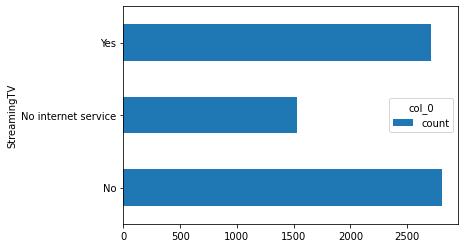

In [69]:
strmtv_df = pd.crosstab(index = df.StreamingTV, columns="count")
strmtv_df.plot(kind="barh", figsize=(6,4), stacked=False)

In [70]:
strmtv_df/strmtv_df.sum()

col_0,count
StreamingTV,
No,0.398978
No internet service,0.216669
Yes,0.384353


### Univariate Analysis of Numerical Variables

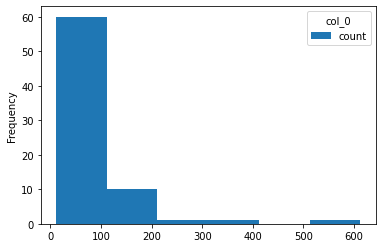

In [71]:
tenure_df = pd.crosstab(index = df.Tenure, columns="count")
tenure_df.plot(kind="hist", figsize=(6,4), bins=6)

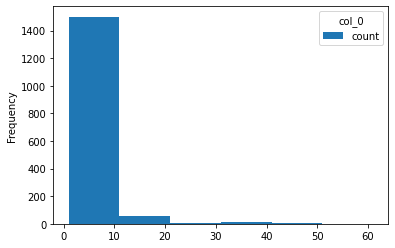

In [72]:
monthly_df = pd.crosstab(index = df.MonthlyCharges, columns="count")
monthly_df.plot(kind="hist", figsize=(6,4), bins=6)

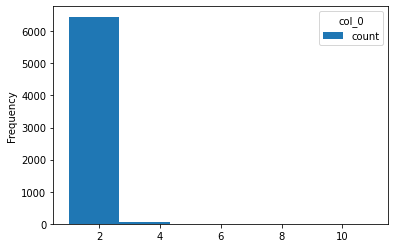

In [73]:
totals_df = pd.crosstab(index = df.TotalCharges, columns="count")
totals_df.plot(kind="hist", figsize=(6,4), bins=6)

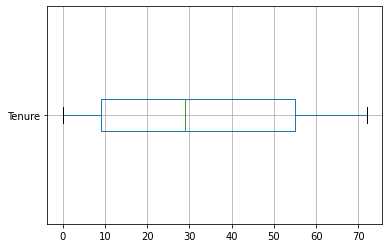

In [74]:
df.boxplot(column='Tenure', return_type='axes', vert=False)

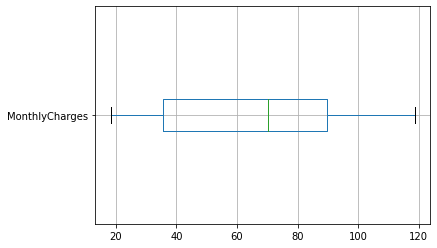

In [75]:
df.boxplot(column='MonthlyCharges', return_type='axes', vert=False)

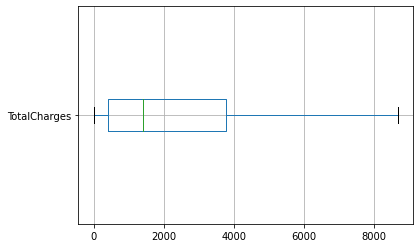

In [76]:
df.boxplot(column='TotalCharges', return_type='axes', vert=False)

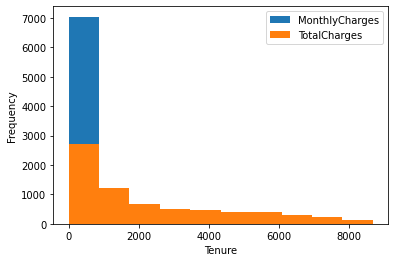

In [77]:
df.plot.hist(x='Tenure')
plt.xlabel('Tenure')
plt.show()